In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
import tensorflow as tf

In [43]:
df_1 = pd.read_csv('/Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/train/train_emoticon.csv')
df_3 = pd.read_csv('/Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/train/train_text_seq.csv')
valid_df_1 = pd.read_csv('/Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/valid/valid_emoticon.csv')
valid_df_3 = pd.read_csv('/Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/valid/valid_text_seq.csv')

In [44]:
data = np.load("/Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/train/train_feature.npz")
data_valid = np.load("/Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/valid/valid_feature.npz")
path = tf.keras.utils.get_file('train_feature.npz', 'file:///Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/train/train_feature.npz')
path_valid = tf.keras.utils.get_file('valid_feature.npz', 'file:///Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/valid/valid_feature.npz')
with np.load(path) as data:
  train_examples = data['features']
  train_labels = data['label']
with np.load(path_valid) as data:
  valid_examples = data['features']
  valid_labels = data['label']

In [45]:
print(train_examples.shape, train_labels.shape)

train_examples = np.asarray(train_examples, dtype=np.float32)
train_labels = np.asarray(train_labels, dtype=np.int32)
valid_examples = np.asarray(valid_examples, dtype=np.float32)
valid_labels = np.asarray(valid_labels, dtype=np.int32)



(7080, 13, 768) (7080,)


In [46]:
df_1

,input_emoticon,label
0,😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣,0
1,🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼,0
2,😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼,0
3,😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯,1
4,🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼,1
...,...,...
7075,🙯😺😻😑😣🛐😛🚼🙼🙯😣😑🚠,1
7076,🛐🚼😅🙯😣🙹😛😑😑🙼😣🚍🙯,1
7077,🛜😑🙒😛😣🙯🛐🚼🙼🙬🙯😣😑,1
7078,😣😑😛🛋🛐🙯🚼🚪🙯😑🛀😣🙼,0


In [47]:
df_3

,input_str,label
0,0000154364642718159661428002624223132284159626...,0
1,0004641596369515436422262614110471596262476161...,0
2,0001543626215965999614422464135806142624051159...,0
3,0000154364224641238614262159689561596284351061...,1
4,0004641899422154362069015966142624761262159661...,1
...,...,...
7075,0000026267027181596614464154364222842626141596...,1
7076,0000464422155826261433491543615961596284614390...,1
7077,0003069915964309154366142624644222841795262614...,1
7078,0000614159615436198346426242237758262159694061...,0


In [48]:
train_examples_flat = train_examples.reshape(train_examples.shape[0], -1)
train_data_with_labels = np.hstack((train_examples_flat, train_labels.reshape(-1, 1)))
df_2 = pd.DataFrame(train_data_with_labels) 
valid_examples_flat = valid_examples.reshape(valid_examples.shape[0], -1)
valid_data_with_labels = np.hstack((valid_examples_flat, valid_labels.reshape(-1, 1)))
valid_df_2 = pd.DataFrame(valid_data_with_labels)

In [49]:
df_2

,0,1,2,3,4,5,6,7,8,9,...,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984
0,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,-0.010428,...,0.055177,-0.118184,-0.131268,-0.248308,-0.030563,-0.210591,-0.028888,0.016804,0.082894,0.0
1,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,-0.010428,...,0.050894,-0.103064,-0.059938,-0.253473,-0.177246,-0.040373,0.140488,-0.020949,-0.003448,0.0
2,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,-0.010428,...,0.079247,-0.047782,-0.149243,-0.252450,-0.023745,0.010205,0.043697,-0.008699,0.000463,0.0
3,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,-0.010428,...,0.101118,-0.117015,-0.145422,-0.231792,-0.048320,-0.089497,-0.059478,0.082911,-0.024833,1.0
4,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,-0.010428,...,0.050894,-0.103064,-0.059938,-0.253473,-0.177246,-0.040373,0.140488,-0.020949,-0.003448,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,-0.010428,...,-0.008414,-0.147763,-0.128285,-0.265402,-0.155221,-0.201739,-0.136390,-0.054164,0.018522,1.0
7076,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,-0.010428,...,0.074743,-0.076066,-0.054807,-0.244673,-0.058179,-0.095887,-0.010896,0.001057,-0.034770,1.0
7077,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,-0.010428,...,0.031050,-0.011560,0.037240,-0.251265,0.009879,-0.069403,0.065474,0.131174,-0.091966,1.0
7078,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,-0.010428,...,-0.070814,0.142050,-0.180895,-0.214470,0.153109,-0.050370,0.052357,-0.034153,-0.083809,0.0


In [50]:
df_1_no_label = df_1.drop(columns=['label'])
df_2_no_label = df_2.drop(columns=[9984])
merged_df = pd.concat([df_1_no_label, df_2_no_label, df_3], axis=1)
merged_df

,input_emoticon,0,1,2,3,4,5,6,7,8,...,9976,9977,9978,9979,9980,9981,9982,9983,input_str,label
0,😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,-0.118184,-0.131268,-0.248308,-0.030563,-0.210591,-0.028888,0.016804,0.082894,0000154364642718159661428002624223132284159626...,0
1,🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,-0.103064,-0.059938,-0.253473,-0.177246,-0.040373,0.140488,-0.020949,-0.003448,0004641596369515436422262614110471596262476161...,0
2,😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,-0.047782,-0.149243,-0.252450,-0.023745,0.010205,0.043697,-0.008699,0.000463,0001543626215965999614422464135806142624051159...,0
3,😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,-0.117015,-0.145422,-0.231792,-0.048320,-0.089497,-0.059478,0.082911,-0.024833,0000154364224641238614262159689561596284351061...,1
4,🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,-0.103064,-0.059938,-0.253473,-0.177246,-0.040373,0.140488,-0.020949,-0.003448,0004641899422154362069015966142624761262159661...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,🙯😺😻😑😣🛐😛🚼🙼🙯😣😑🚠,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,-0.147763,-0.128285,-0.265402,-0.155221,-0.201739,-0.136390,-0.054164,0.018522,0000026267027181596614464154364222842626141596...,1
7076,🛐🚼😅🙯😣🙹😛😑😑🙼😣🚍🙯,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,-0.076066,-0.054807,-0.244673,-0.058179,-0.095887,-0.010896,0.001057,-0.034770,0000464422155826261433491543615961596284614390...,1
7077,🛜😑🙒😛😣🙯🛐🚼🙼🙬🙯😣😑,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,-0.011560,0.037240,-0.251265,0.009879,-0.069403,0.065474,0.131174,-0.091966,0003069915964309154366142624644222841795262614...,1
7078,😣😑😛🛋🛐🙯🚼🚪🙯😑🛀😣🙼,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,0.142050,-0.180895,-0.214470,0.153109,-0.050370,0.052357,-0.034153,-0.083809,0000614159615436198346426242237758262159694061...,0


In [51]:
valid_df_1_no_label = valid_df_1.drop(columns=['label'])
valid_df_2_no_label = valid_df_2.drop(columns=[9984])

valid_merged_df = pd.concat([valid_df_1_no_label, valid_df_2_no_label, valid_df_3], axis=1)
valid_merged_df

,input_emoticon,0,1,2,3,4,5,6,7,8,...,9976,9977,9978,9979,9980,9981,9982,9983,input_str,label
0,🚼😛😔😑😣🚚🙯🛐🙼😑😣🙯🚍,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,-0.076066,-0.054807,-0.244673,-0.058179,-0.095887,-0.010896,0.001057,-0.034770,0004221543626231596614341412624642841596614262...,1
1,🛐😣🙗😛🙸🙯😑🚼😑🙯😣🙼😉,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,-0.021044,-0.028154,-0.275227,-0.145210,-0.049569,-0.093691,0.162462,-0.108675,0004646141250615436232726215964221596262614284...,1
2,🚼🛐🚩😛🙯🚄😣😑😸🙯😑🙼😣,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,0.084240,-0.073388,-0.237486,0.109919,0.043377,0.081005,-0.041821,0.119433,0004224644543615436262336561415962713262159628...,0
3,😛😡😑🙻😣🙯🚼🛐😣😒🙯🙼😑,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,-0.118184,-0.131268,-0.248308,-0.030563,-0.210591,-0.028888,0.016804,0.082894,0000154361120159643716142624224646143132262284...,0
4,🙨😑😳😛😣🛐🚼🙯😚😣🙼😑🙯,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,-0.057454,0.068505,-0.268164,-0.128146,-0.190372,-0.097099,0.234058,-0.173977,0003324159623684154366144644222625705614284159...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,🙯😱🛐🚼😑😣😛🚚😑🙼😣🙯😓,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,-0.125898,-0.009716,-0.248754,-0.274071,-0.099834,-0.156583,0.088166,0.043699,0002621157464422159661415436341411596284614262...,1
485,😣🙯🚟🛐🚼😛😖😑🛅🙯😑🙼😣,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,-0.044685,-0.074306,-0.243231,0.043470,0.097231,0.115097,-0.027389,0.124625,0000614262189946442215436262015962998262159628...,0
486,😣😜🙯🛐🚼😑😛🙕😣🙼🛋😑🙯,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,-0.066240,-0.209952,-0.239671,0.045708,-0.051223,0.060893,-0.034021,-0.059369,0000614622426246442215961543627806142841983159...,0
487,🛐😣🛔🙯😑🙩😛🚼😣🙼😑🙯😕,-0.068623,-0.020298,0.064471,-0.062085,-0.113519,-0.062337,-0.217193,-0.029746,0.003866,...,-0.112629,-0.103027,-0.236560,-0.114273,-0.244401,-0.030974,0.058870,-0.021004,0000464614150226215964349154364226142841596262...,0


In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [53]:
train_texts = merged_df['input_emoticon'].values
train_labels = merged_df['label'].values
validation_texts = valid_df_1['input_emoticon'].values
validation_labels = valid_df_1['label'].values

tokenizer = Tokenizer(char_level=True)  
tokenizer.fit_on_texts(train_texts) 
train_sequences = tokenizer.texts_to_sequences(train_texts)
valid_sequences = tokenizer.texts_to_sequences(validation_texts)

max_len = max([len(seq) for seq in train_sequences])   
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post')
train_labels = train_labels.astype(int)

validation_padded = pad_sequences(valid_sequences, maxlen=max_len, padding='post')
validation_labels = validation_labels.astype(int)


In [54]:
merged_df.drop(columns=['input_emoticon'], inplace=True)
valid_merged_df.drop(columns=['input_emoticon'], inplace=True)

In [55]:
train_padded_df = pd.DataFrame(train_padded, columns=[f'padded_{i}' for i in range(train_padded.shape[1])])
merged_df = pd.concat([train_padded_df,merged_df], axis=1)
merged_df

,padded_0,padded_1,padded_2,padded_3,padded_4,padded_5,padded_6,padded_7,padded_8,padded_9,...,9976,9977,9978,9979,9980,9981,9982,9983,input_str,label
0,4,5,32,1,2,127,3,6,18,7,...,-0.118184,-0.131268,-0.248308,-0.030563,-0.210591,-0.028888,0.016804,0.082894,0000154364642718159661428002624223132284159626...,0
1,5,1,33,4,6,3,2,111,1,3,...,-0.103064,-0.059938,-0.253473,-0.177246,-0.040373,0.140488,-0.020949,-0.003448,0004641596369515436422262614110471596262476161...,0
2,4,3,1,46,2,6,5,103,2,3,...,-0.047782,-0.149243,-0.252450,-0.023745,0.010205,0.043697,-0.008699,0.000463,0001543626215965999614422464135806142624051159...,0
3,4,6,5,92,2,3,1,199,1,7,...,-0.117015,-0.145422,-0.231792,-0.048320,-0.089497,-0.059478,0.082911,-0.024833,0000154364224641238614262159689561596284351061...,1
4,5,93,6,4,210,1,2,3,67,3,...,-0.103064,-0.059938,-0.253473,-0.177246,-0.040373,0.140488,-0.020949,-0.003448,0004641899422154362069015966142624761262159661...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,3,120,32,1,2,5,4,6,7,3,...,-0.147763,-0.128285,-0.265402,-0.155221,-0.201739,-0.136390,-0.054164,0.018522,0000026267027181596614464154364222842626141596...,1
7076,5,6,81,3,2,195,4,1,1,7,...,-0.076066,-0.054807,-0.244673,-0.058179,-0.095887,-0.010896,0.001057,-0.034770,0000464422155826261433491543615961596284614390...,1
7077,172,1,37,4,2,3,5,6,7,26,...,-0.011560,0.037240,-0.251265,0.009879,-0.069403,0.065474,0.131174,-0.091966,0003069915964309154366142624644222841795262614...,1
7078,2,1,4,83,5,3,6,190,3,1,...,0.142050,-0.180895,-0.214470,0.153109,-0.050370,0.052357,-0.034153,-0.083809,0000614159615436198346426242237758262159694061...,0


In [56]:
valid_padded_df = pd.DataFrame(validation_padded, columns=[f'padded_{i}' for i in range(validation_padded.shape[1])])
valid_merged_df = pd.concat([valid_padded_df,valid_merged_df], axis=1)
valid_merged_df

,padded_0,padded_1,padded_2,padded_3,padded_4,padded_5,padded_6,padded_7,padded_8,padded_9,...,9976,9977,9978,9979,9980,9981,9982,9983,input_str,label
0,6,4,44,1,2,194,3,5,7,1,...,-0.076066,-0.054807,-0.244673,-0.058179,-0.095887,-0.010896,0.001057,-0.034770,0004221543626231596614341412624642841596614262...,1
1,5,2,214,4,50,3,1,6,1,3,...,-0.021044,-0.028154,-0.275227,-0.145210,-0.049569,-0.093691,0.162462,-0.108675,0004646141250615436232726215964221596262614284...,1
2,6,5,182,4,3,94,2,1,82,3,...,0.084240,-0.073388,-0.237486,0.109919,0.043377,0.081005,-0.041821,0.119433,0004224644543615436262336561415962713262159628...,0
3,4,17,1,117,2,3,6,5,2,18,...,-0.118184,-0.131268,-0.248308,-0.030563,-0.210591,-0.028888,0.016804,0.082894,0000154361120159643716142624224646143132262284...,0
4,19,1,164,4,2,5,6,3,86,2,...,-0.057454,0.068505,-0.268164,-0.128146,-0.190372,-0.097099,0.234058,-0.173977,0003324159623684154366144644222625705614284159...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,3,71,5,6,1,2,4,194,1,7,...,-0.125898,-0.009716,-0.248754,-0.274071,-0.099834,-0.156583,0.088166,0.043699,0002621157464422159661415436341411596284614262...,1
485,2,3,93,5,6,4,144,1,90,3,...,-0.044685,-0.074306,-0.243231,0.043470,0.097231,0.115097,-0.027389,0.124625,0000614262189946442215436262015962998262159628...,0
486,2,99,3,5,6,1,4,68,2,7,...,-0.066240,-0.209952,-0.239671,0.045708,-0.051223,0.060893,-0.034021,-0.059369,0000614622426246442215961543627806142841983159...,0
487,5,2,128,3,1,55,4,6,2,7,...,-0.112629,-0.103027,-0.236560,-0.114273,-0.244401,-0.030974,0.058870,-0.021004,0000464614150226215964349154364226142841596262...,0


In [57]:
def split_into_chunks(input_str, chunk_size=2):
    return [input_str[i:i+chunk_size] for i in range(0, len(input_str), chunk_size)]

chunks_df_valid = merged_df['input_str'].apply(split_into_chunks).apply(pd.Series)
chunks_df_valid.columns = [f'chunk_{i+1}' for i in range(chunks_df_valid.shape[1])]
merged_df = pd.concat([merged_df, chunks_df_valid], axis=1)

merged_df.drop(columns=['input_str'], inplace=True)

chunks_df_valid = valid_merged_df['input_str'].apply(split_into_chunks).apply(pd.Series)
chunks_df_valid.columns = [f'chunk_{i+1}' for i in range(chunks_df_valid.shape[1])]
valid_merged_df = pd.concat([valid_merged_df, chunks_df_valid], axis=1)

valid_merged_df.drop(columns=['input_str'], inplace=True)

In [58]:
merged_df

,padded_0,padded_1,padded_2,padded_3,padded_4,padded_5,padded_6,padded_7,padded_8,padded_9,...,chunk_16,chunk_17,chunk_18,chunk_19,chunk_20,chunk_21,chunk_22,chunk_23,chunk_24,chunk_25
0,4,5,32,1,2,127,3,6,18,7,...,42,23,13,22,84,15,96,26,26,14
1,5,1,33,4,6,3,2,111,1,3,...,04,71,59,62,62,47,61,61,42,84
2,4,3,1,46,2,6,5,103,2,3,...,58,06,14,26,24,05,11,59,62,84
3,4,6,5,92,2,3,1,199,1,7,...,95,61,59,62,84,35,10,61,42,62
4,5,93,6,4,210,1,2,3,67,3,...,26,24,76,12,62,15,96,61,42,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,3,120,32,1,2,5,4,6,7,3,...,42,22,84,26,26,14,15,96,24,14
7076,5,6,81,3,2,195,4,1,1,7,...,59,61,59,62,84,61,43,90,12,62
7077,172,1,37,4,2,3,5,6,7,26,...,42,22,84,17,95,26,26,14,15,96
7078,2,1,4,83,5,3,6,190,3,1,...,77,58,26,21,59,69,40,61,42,84


In [59]:
# Calculate feature correlations with the target
correlations = merged_df.drop(columns=['label']).corrwith(merged_df['label'])

# Set the correlation threshold
correlation_threshold = 0.00001

# Select features with correlation above the threshold
selected_features = correlations[abs(correlations) > correlation_threshold].index.tolist()

# Filter the training and validation data to include only selected features
merged_df_filtered = merged_df[selected_features + ['label']]
valid_merged_df_filtered = valid_merged_df[selected_features + ['label']]

print(f"Original number of features: {merged_df.shape[1] - 1}")  # Subtract 1 to exclude the 'label' column
print(f"Number of features after correlation filtering: {len(selected_features)}")

# Update the merged datasets
merged_df = merged_df_filtered
valid_merged_df = valid_merged_df_filtered


/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Original number of features: 10022
Number of features after correlation filtering: 2341


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train = merged_df.drop(columns=['label'])
valid = valid_merged_df.drop(columns=['label'])
train_labels = merged_df['label']
valid_labels = valid_merged_df['label']

# Convert column names to strings
train.columns = train.columns.astype(str)
valid.columns = valid.columns.astype(str)

clf = RandomForestClassifier(n_estimators=250, random_state=0)
clf.fit(train, train_labels)
y_pred = clf.predict(valid)
print("Accuracy:", accuracy_score(valid_labels, y_pred))

Accuracy: 0.9856850715746421


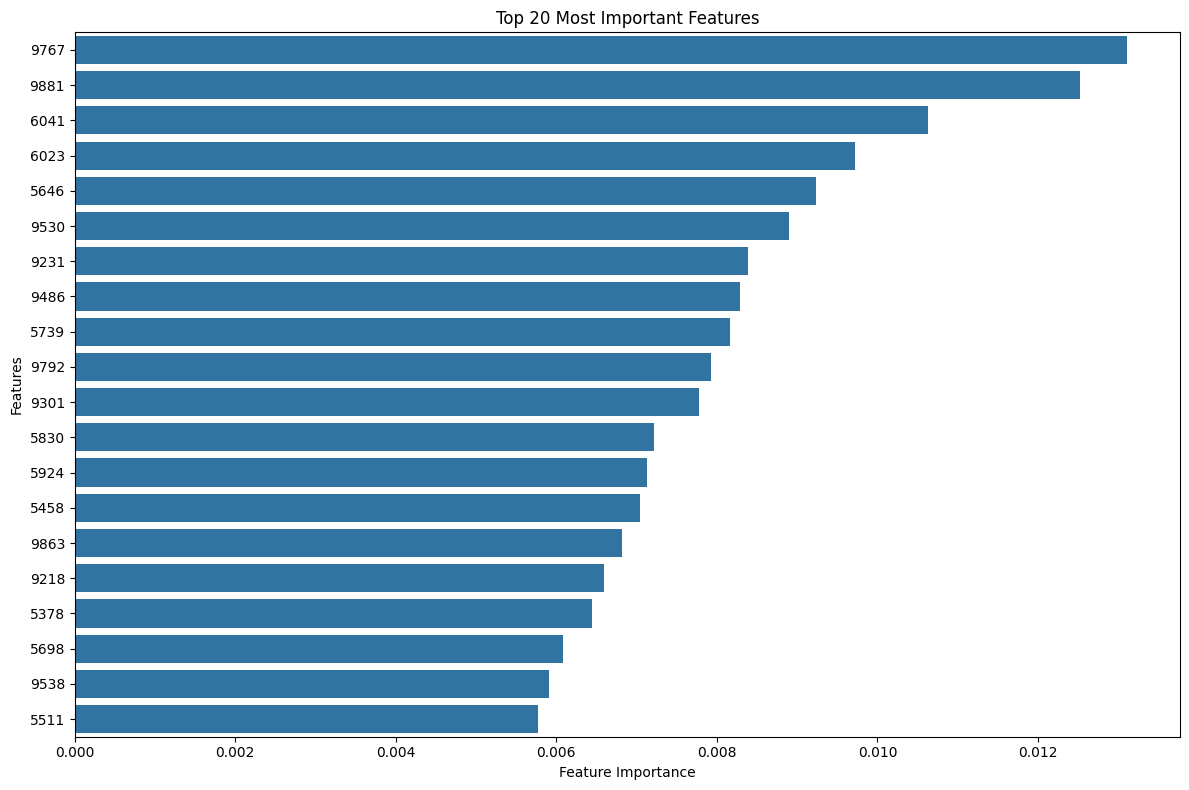

Top 20 Most Important Features:
9767    0.013115
9881    0.012530
6041    0.010631
6023    0.009723
5646    0.009239
9530    0.008898
9231    0.008384
9486    0.008283
5739    0.008165
9792    0.007923
9301    0.007776
5830    0.007219
5924    0.007124
5458    0.007038
9863    0.006812
9218    0.006589
5378    0.006450
5698    0.006089
9538    0.005912
5511    0.005776
dtype: float64


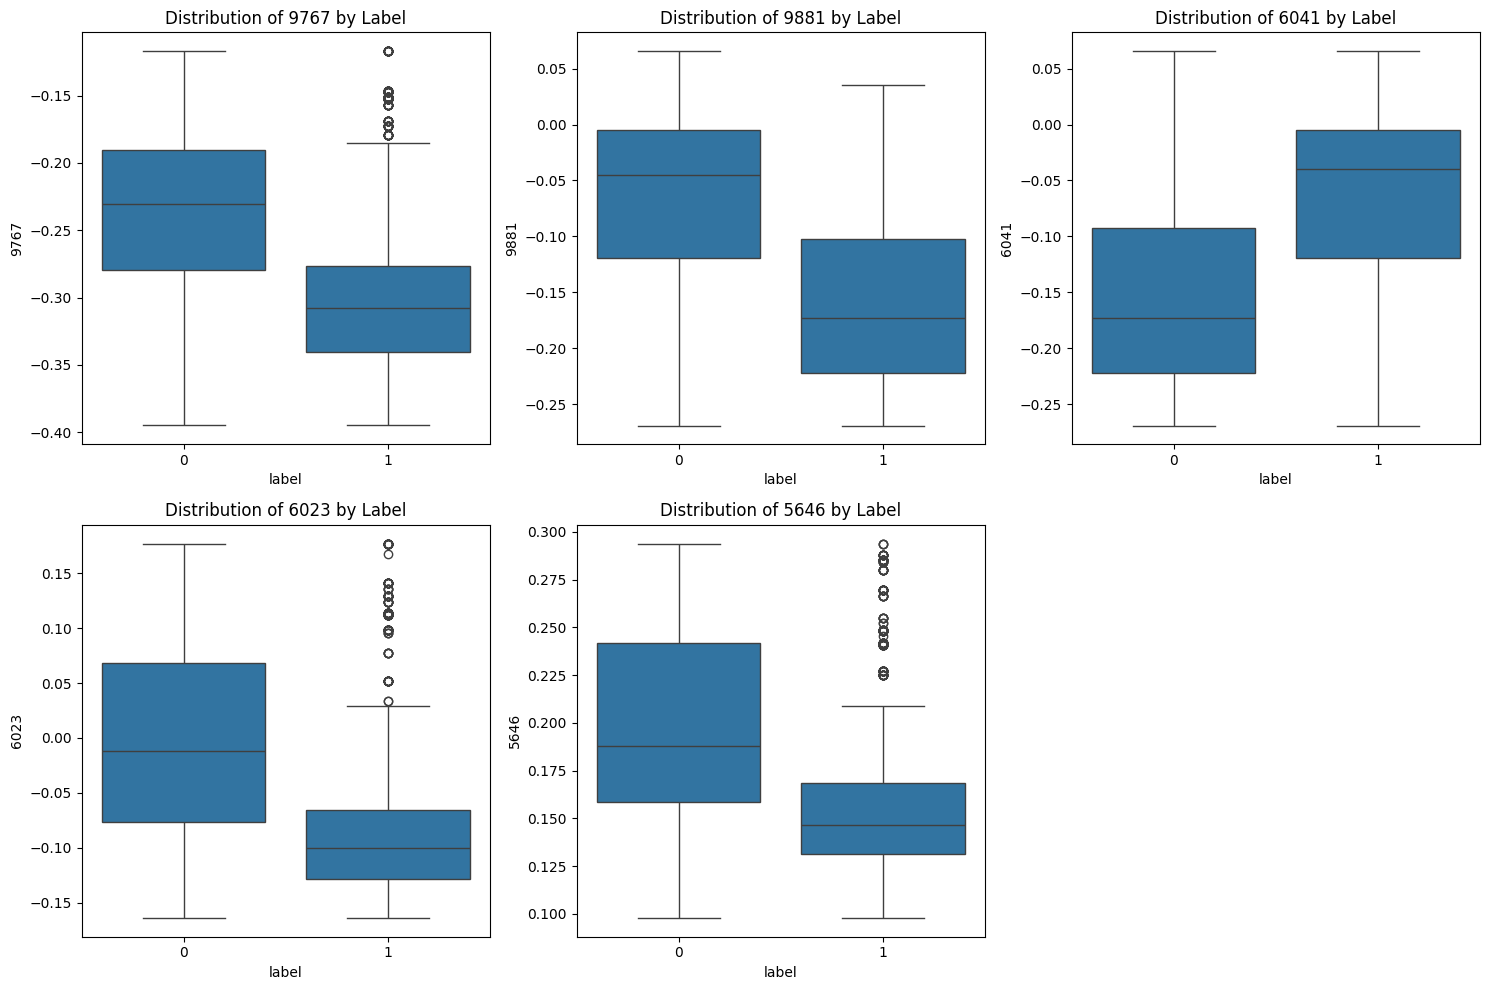

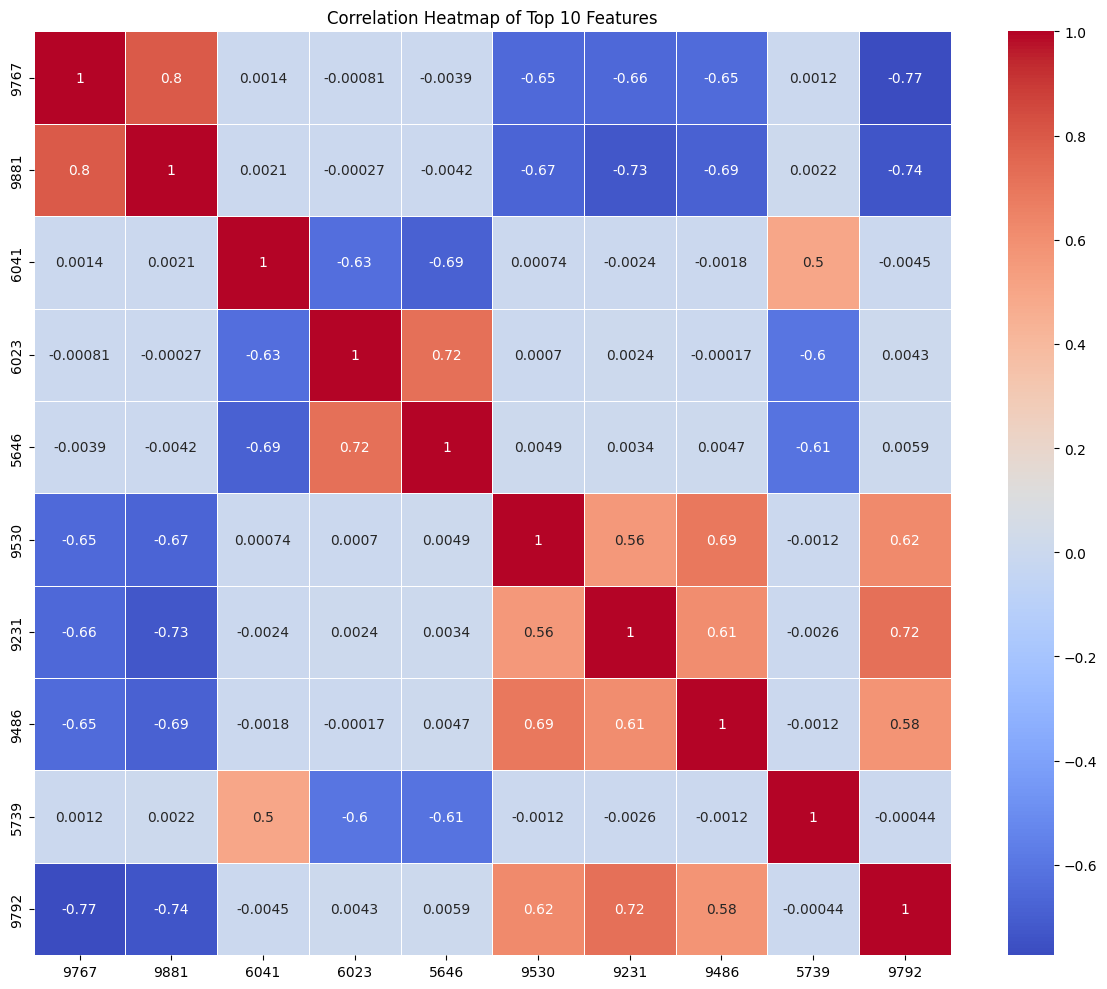

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train the model on the full dataset
clf = RandomForestClassifier(n_estimators=250, random_state=0)
clf.fit(train, train_labels)

# Get feature importances
importances = clf.feature_importances_
feature_importances = pd.Series(importances, index=train.columns).sort_values(ascending=False)

# Select top 20 important features
top_20_features = feature_importances.head(20)

# Create a bar plot of feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_features.values, y=top_20_features.index)
plt.title('Top 20 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Print the top 20 important features
print("Top 20 Most Important Features:")
print(top_20_features)

# Analyze the relationship between top features and the target variable
top_5_features = feature_importances.head(5).index.tolist()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_5_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='label', y=feature, data=pd.concat([train[feature], train_labels], axis=1))
    plt.title(f'Distribution of {feature} by Label')

plt.tight_layout()
plt.show()

# Correlation heatmap of top 10 features
top_10_features = feature_importances.head(10).index.tolist()
correlation_matrix = train[top_10_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Top 10 Features')
plt.tight_layout()
plt.show()


In [62]:
from sklearn.model_selection import train_test_split

train_examples_80, train_examples_20, train_labels_80, train_labels_20 = train_test_split( train, train_labels, test_size=0.2, random_state=42)
train_examples_70, train_examples_30, train_labels_70, train_labels_30 = train_test_split( train, train_labels, test_size=0.3, random_state=42)
train_examples_60, train_examples_40, train_labels_60, train_labels_40 = train_test_split( train, train_labels, test_size=0.4, random_state=42)
train_examples_50, train_examples_50, train_labels_50, train_labels_50 = train_test_split( train, train_labels, test_size=0.5, random_state=42)

In [63]:
clf = RandomForestClassifier(n_estimators=250, random_state=0)
clf.fit(train, train_labels)
y_pred = clf.predict(valid)
print("Accuracy with 100%:", accuracy_score(valid_labels, y_pred))

Accuracy with 100%: 0.9856850715746421


In [64]:

clf_1 = RandomForestClassifier(n_estimators=250, random_state=0)
clf_1.fit(train_examples_80, train_labels_80)
y_pred = clf_1.predict(valid)
print("Accuracy with 80%:", accuracy_score(valid_labels, y_pred))

Accuracy with 80%: 0.9877300613496932


In [65]:
clf_2 = RandomForestClassifier(n_estimators=250, random_state=0)
clf_2.fit(train_examples_60, train_labels_60)
y_pred = clf_2.predict(valid)
print("Accuracy with 60%:", accuracy_score(valid_labels, y_pred))

Accuracy with 70%: 0.9754601226993865


In [66]:
clf_3 = RandomForestClassifier(n_estimators=250,  random_state=0)
clf_3.fit(train_examples_40, train_labels_40)
y_pred = clf_3.predict(valid)
print("Accuracy with 40%:", accuracy_score(valid_labels, y_pred))

Accuracy with 60%: 0.9734151329243353


In [67]:
clf_4 = RandomForestClassifier(n_estimators=250, random_state=0)
clf_4.fit(train_examples_20, train_labels_20)
y_pred = clf_4.predict(valid)
print("Accuracy with 20%:", accuracy_score(valid_labels, y_pred))

Accuracy with 50%: 0.9529652351738241


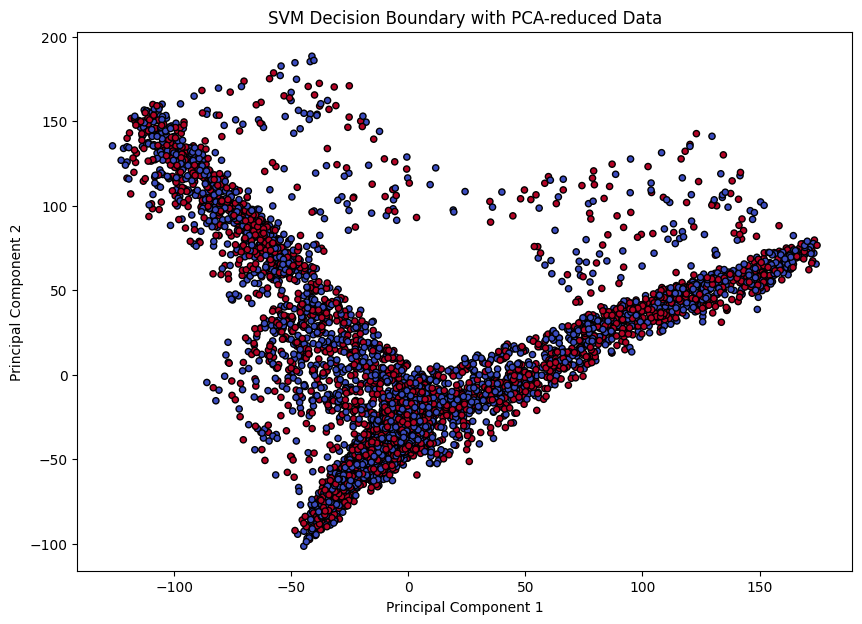

In [40]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(train)
valid_pca = pca.fit_transform(valid)

# # X_train, X_test, y_train, y_test = train_test_split(pca_result, train_labels, test_size=0.3, random_state=42)
# svm_classifier = SVC(kernel='poly',degree=1)  # Using a linear kernel for simplicity
# svm_classifier.fit(pca_result, train_labels)
# y_pred = svm_classifier.predict(valid_pca)
# accuracy = accuracy_score(valid_labels, y_pred)
# print(f"SVM Accuracy on Test Data: {accuracy * 100:.2f}%")


# h = .02  # Step size in the mesh
# x_min, x_max = pca_result[:, 0].min() - 1, pca_result[:, 0].max() + 1
# y_min, y_max = pca_result[:, 1].min() - 1, pca_result[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Plot decision boundary by predicting for each point in the mesh
# Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# Step 7: Plot the PCA components and the decision boundary
plt.figure(figsize=(10, 7))
# plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)  # Plot decision boundary
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_labels, cmap='coolwarm', edgecolors='k', s=20)  # Plot data points
#plt.scatter(valid_pca[:, 0], valid_pca[:, 1], c=valid_labels, cmap='coolwarm', s=5, label='Valid')
plt.title('SVM Decision Boundary with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [32]:
importances = clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': train.columns, 'Importance': importances})
 
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

      Feature  Importance
2210     9881    0.012987
1442     6041    0.012447
1328     5927    0.010701
2096     9767    0.010379
1449     6048    0.010003
...       ...         ...
2313  chunk_2    0.000018
872      5471    0.000017
2277     9948    0.000017
1581     9252    0.000004
813      5412    0.000002

[2337 rows x 2 columns]
